# Run Llama3.2 Vision with Langchain and Ollama

# Ollama
Ollama is a free and open-source tool that lets anyone run open LLMs locally on your system. It supports Linux (Systemd-powered distros), Windows, and macOS (Apple Silicon).

It is a command-line interface (CLI) tool that lets you conveniently download LLMs and run it locally and privately. With a couple of commands you can download models like Llama 3, Mixtral, and more.

- https://ollama.com/library
- https://github.com/ollama/ollama

# Llama 3.2 11B Vision Instruct

https://huggingface.co/meta-llama/Llama-3.2-11B-Vision-Instruct

The Llama 3.2-Vision collection of multimodal large language models (LLMs) is a collection of pretrained and instruction-tuned image reasoning generative models in 11B and 90B sizes (text + images in / text out). The Llama 3.2-Vision instruction-tuned models are optimized for visual recognition, image reasoning, captioning, and answering general questions about an image.


# Langchain Chat Ollama
LangChain is a framework for developing applications powered by large language models (LLMs).

https://python.langchain.com/docs/integrations/chat/ollama/

In [1]:
! pip install -Uqqq pip --progress-bar off
! pip install -qqq transformers -U --progress-bar off
! pip install sentence-transformers  langchain langchain-community langchain-huggingface trl datasets pypdf  -qqq --progress-bar off
! pip install torch torchvision -qqq --progress-bar off
! pip install langchain-ollama "ollama==0.4.2" -q

ERROR: To modify pip, please run the following command:
C:\Users\athos\anaconda3\python.exe -m pip install -Uqqq pip --progress-bar off


In [2]:
from langchain_ollama import OllamaEmbeddings


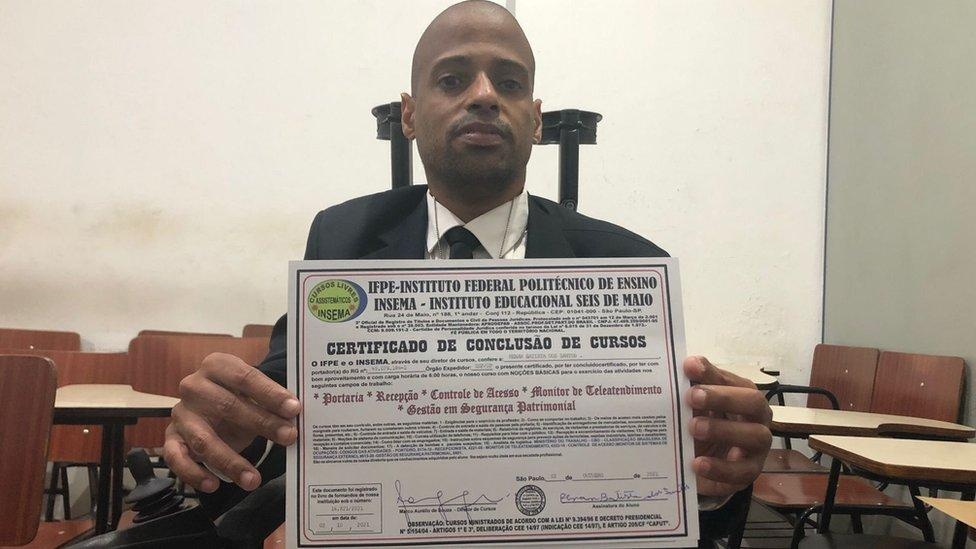

In [6]:
import base64
from io import BytesIO
import pprint

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "img.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)



In [8]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2-vision", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "Only extract text of this image literally", "image": image_b64}
)

pprint.pprint(query_chain)

('IFPE-Instituto Federal do Rio de Janeiro\n'
 'INSEMA - Instituto Educacional\n'
 'CERTIFICADO DE CONCLUSAO\n'
 'O IFPE - INSEMA certifica que o aluno ________________________ concluiu com '
 'sucesso o curso de ________________________ oferecido pelo IFPE - INSEMA, '
 'campus ________________________, no período de ________________________. O '
 'presente certificado é válido para fins de reconhecimento acadêmico e '
 'profissional.\n'
 'Portaria * Recepção * Controle de Acesso * Monitoria\n'
 'Gestão em Segurança Patrimonial')



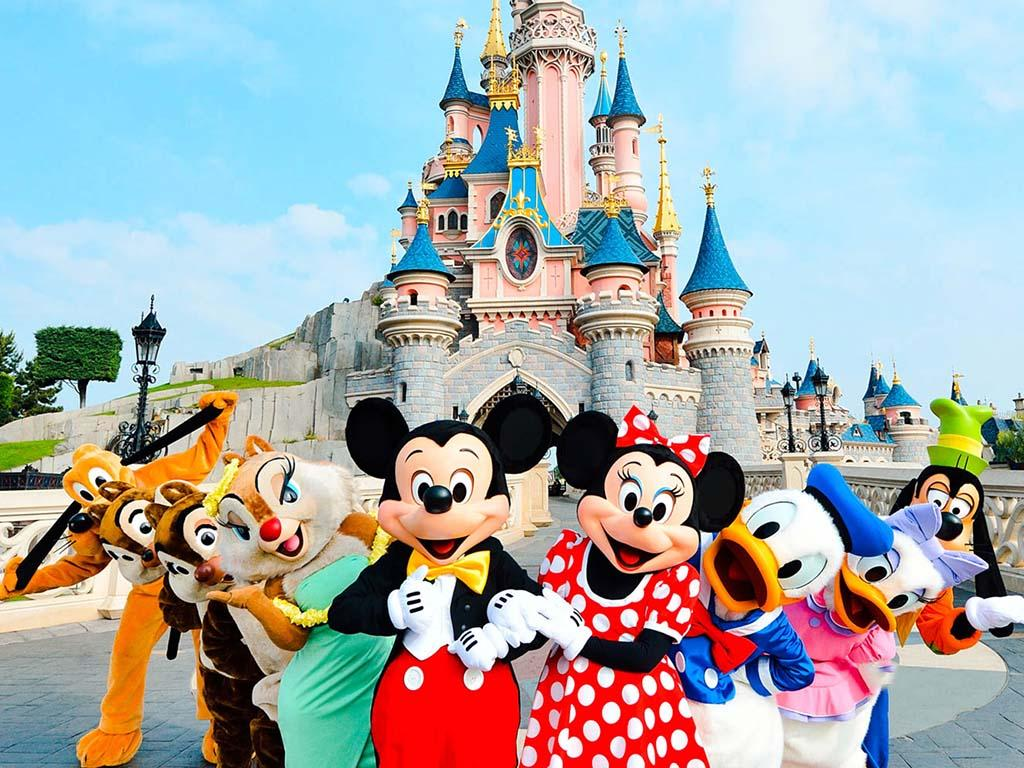

In [9]:
file_path = "img2.jpg"
pil_image = Image.open(file_path)

image_b642 = convert_to_base64(pil_image)
plt_img_base64(image_b642)

In [10]:
query_chain = chain.invoke(
    {"text": "Describe this image", "image": image_b642}
)

pprint.pprint(query_chain)

('The image shows a group of Disney characters standing in front of the iconic '
 'Disneyland castle. The purpose of the image is to showcase the beloved '
 'characters and the famous landmark.\n'
 '\n'
 '* A group of Disney characters are standing together:\n'
 '\t+ There are 8 characters in total.\n'
 '\t+ They are all wearing their signature outfits.\n'
 '\t+ Some of them have their arms around each other.\n'
 '* They are all wearing their signature outfits:\n'
 '\t+ Mickey Mouse is wearing his iconic red shorts and yellow shoes.\n'
 '\t+ Minnie Mouse is wearing her polka-dot dress and bow.\n'
 '\t+ Goofy is wearing his green hat and orange shirt.\n'
 '\t+ Pluto is wearing his blue collar and leash.\n'
 '\t+ Donald Duck is wearing his sailor suit and hat.\n'
 '\t+ Daisy Duck is wearing her pink dress and hat.\n'
 "\t+ Chip 'n' Dale are wearing their matching outfits.\n"
 '* The background is the Disneyland castle:\n'
 '\t+ The castle is a large, white structure with towers and turre